# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

Correlação entre p1 e p2: 0.8957365818728044
Correlação entre média e diferença: -0.13347385411788848


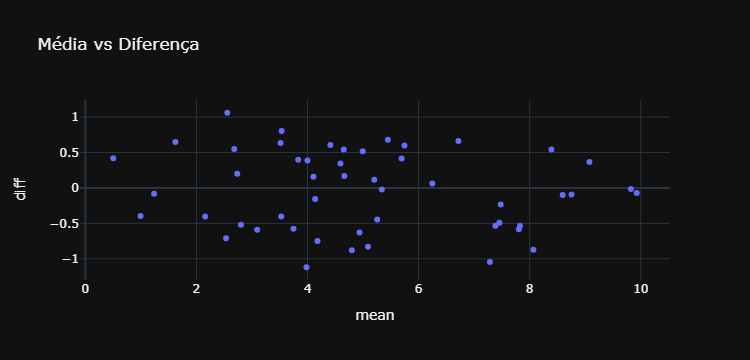

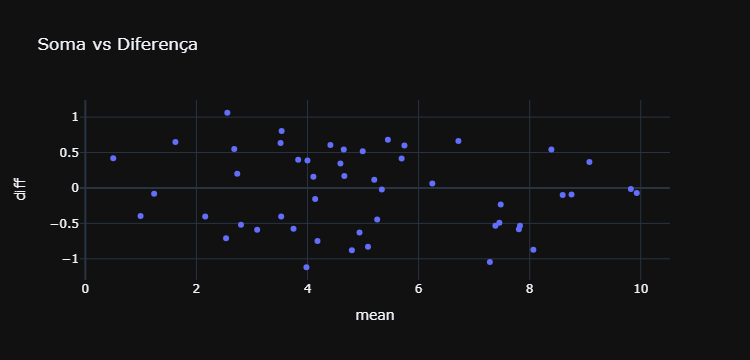

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

T = np.array([[0.5, 0.5], [0.5, -0.5]])

X = df[['p1', 'p2']].values.T

transformed_data = T @ X
df['mean'] = transformed_data[0, :]
df['diff'] = transformed_data[1, :]

correlation_p1_p2 = df[['p1', 'p2']].corr().iloc[0, 1]

correlation_mean_diff = df[['mean', 'diff']].corr().iloc[0, 1]

print(f"Correlação entre p1 e p2: {correlation_p1_p2}")
print(f"Correlação entre média e diferença: {correlation_mean_diff}")


df['sum'] = df['p1'] + df['p2']



fig = px.scatter(df,x='mean', y='diff',title='Média vs Diferença',template='plotly_dark',color_continuous_scale='viridis')
fig.show()

fig2 = px.scatter(df,x='mean', y='diff',title='Soma vs Diferença',template='plotly_dark',color_continuous_scale=px.colors.sequential.Viridis)
fig2.show()




### Comentário sobre as correlações observadas

1. **Correlação entre p1 e p2 (0.896)**: 
   - Esta é uma correlação alta e positiva, o que faz sentido, pois `p2` foi gerada a partir de `p1` com uma pequena perturbação (ruído). Isso significa que os dados das duas provas estão fortemente relacionados, sugerindo que, em geral, alunos que tiram notas altas em `p1` tendem a tirar notas altas em `p2`, e o mesmo vale para notas baixas.

2. **Correlação entre a média e a diferença (-0.133)**: 
   - A correlação negativa e baixa entre a média e a diferença indica que essas duas variáveis estão relativamente independentes. Quando transformamos os dados em termos de **média** (representando uma tendência central) e **diferença** (representando a variação entre `p1` e `p2`), estamos separando dois aspectos diferentes dos dados. A baixa correlação sugere que saber a média das notas não nos ajuda a prever a diferença entre elas e vice-versa.

### Interpretação
- A transformação para média e diferença desassocia os dois aspectos dos dados que, inicialmente, estavam fortemente correlacionados. A **média** capta o valor central das notas, enquanto a **diferença** mede a discrepância entre elas. Como resultado, a correlação entre média e diferença se aproxima de zero, indicando que essas duas novas variáveis estão bem menos relacionadas do que os dados originais (`p1` e `p2`).

- Esse tipo de transformação é útil para reduzir correlações indesejadas e examinar padrões diferentes nos dados.
